## AMP®-Parkinson's Disease Progression Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Define Metric SMAPE
This is a Python function that calculates the symmetric mean absolute percentage error (SMAPE) between two arrays, y_true and y_pred.

The SMAPE is a measure of the percentage difference between two values, and it is commonly used to evaluate the accuracy of forecasts or predictions. The formula for SMAPE is:

\begin{equation*} \text{SMAPE}(y_{\text{true}}, y_{\text{pred}}) = \frac{100}{n} \sum_{i=1}^{n} \begin{cases} \dfrac{2 \cdot \left| y_{\text{pred}, i} - y_{\text{true}, i} \right|}{\left| y_{\text{pred}, i} \right| + \left| y_{\text{true}, i} \right|} & \text{if } y_{\text{pred}, i} \neq 0 \text{ or } y_{\text{true}, i} \neq 0 \\ 0 & \text{otherwise} \end{cases} \end{equation*}

where n is the number of elements in the arrays.

The smape function below calculates SMAPE using a slightly different formula:

\begin{equation*} \text{SMAPE}(y_{\text{true}}, y_{\text{pred}}) = \frac{100}{n} \sum_{i=1}^n \frac{\left| y_{i,\text{pred}} - y_{i,\text{true}} \right|}{(\left| y_{i,\text{true}} \right| + \left| y_{i,\text{pred}} \right|) / 2} \end{equation*}

This formula is symmetric and scales the error based on the magnitude of the true and predicted values. The function returns the average SMAPE across all elements in the arrays, multiplied by 100 to express the result as a percentage.

The pos_ind variable in the function is a boolean array that is True where the denominator of the SMAPE calculation is non-zero. This is to avoid division by zero errors. SMAPE is used to evaluate the performance of a linear regression model.

In [2]:
def smape(y_true, y_pred):
    smap = np.zeros(len(y_true))
    
    num = np.abs(y_true - y_pred)
    dem = ((np.abs(y_true) + np.abs(y_pred)) / 2)
    
    pos_ind = (y_true != 0)|(y_pred != 0)
    smap[pos_ind] = num[pos_ind] / dem[pos_ind]
    
    return 100 * np.mean(smap)

### Function for Plotting
Here are the formulae for **mean squared error (MSE), mean absolute error (MAE), and R-squared (R2) for linear regression**:

\begin{equation*}
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2
\end{equation*}

\begin{equation*}
MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y_i}|
\end{equation*}

\begin{equation*}
R2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
\end{equation*}

where n is the number of samples, $y_i$ is the actual value of the dependent variable for the $i-th$ sample, $\hat{y_i}$ is the predicted value of the dependent variable for the $i-th$ sample, and $\bar{y}$ is the mean of the actual values of the dependent variable. **They are included in the scikit-learn library to evaluate the performance of a linear regression model.**

In [4]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize = (width, height))

    ax1 = sns.distplot(RedFunction, hist = False, color = "r", label = RedName)
    ax2 = sns.distplot(BlueFunction, hist = False, color = "b", label = BlueName, ax = ax1)

    plt.title(Title)
    plt.legend()
    plt.xlabel('Visit Month')
    plt.ylabel('Score')

    plt.show()
    plt.close()

In [5]:
proteins = pd.read_csv('data/train/train_proteins.csv')
print('Proteins shape:',proteins.shape)
proteins.head()

Proteins shape: (232741, 5)


,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0


In [6]:
peptides = pd.read_csv('data/train/train_peptides.csv')
print('Peptides shape:', peptides.shape)
peptides.head()

Peptides shape: (981834, 6)


,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7


In [7]:
clinical = pd.read_csv('data/train/train_clinical_data.csv')
print('Clinical shape:', clinical.shape)
clinical.head()

Clinical shape: (2615, 8)


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On


In [8]:
supplemental_clinical = pd.read_csv('data/train/supplemental_clinical_data.csv')
print('Supplemental Clinical shape:', clinical.shape)
supplemental_clinical.head()

Supplemental Clinical shape: (2615, 8)


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN
2,75_0,75,0,4.0,6.0,26.0,0.0,NaN
3,75_36,75,36,1.0,8.0,38.0,0.0,On
4,155_0,155,0,NaN,NaN,0.0,NaN,NaN


In [10]:
# Merge the 3 Train Datasets
# Merge the proteins data and peptides data on the common columns.
merged_proteins_peptides = pd.merge(proteins, peptides, on = ['visit_id', 'visit_month', 'patient_id', 'UniProt'])

# Merge the merged protein-peptides data with the clinical data on the common columns.
merged = pd.merge(merged_proteins_peptides, clinical, on = ['visit_id', 'visit_month', 'patient_id'])

# Show the merged data.
merged

,visit_id,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.30,10.0,6.0,15.0,NaN,NaN
1,55_0,0,55,O00533,732430.0,GNPEPTFSWTK,102060.00,10.0,6.0,15.0,NaN,NaN
2,55_0,0,55,O00533,732430.0,IEIPSSVQQVPTIIK,174185.00,10.0,6.0,15.0,NaN,NaN
3,55_0,0,55,O00533,732430.0,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90,10.0,6.0,15.0,NaN,NaN
4,55_0,0,55,O00533,732430.0,SMEQNGPGLEYR,30838.70,10.0,6.0,15.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
941739,58648_108,108,58648,Q9UHG2,369437.0,ILAGSADSEGVAAPR,202820.00,6.0,0.0,0.0,NaN,NaN
941740,58648_108,108,58648,Q9UKV8,105830.0,SGNIPAGTTVDTK,105830.00,6.0,0.0,0.0,NaN,NaN
941741,58648_108,108,58648,Q9Y646,21257.6,LALLVDTVGPR,21257.60,6.0,0.0,0.0,NaN,NaN
941742,58648_108,108,58648,Q9Y6R7,17953.1,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26,6.0,0.0,0.0,NaN,NaN


In [13]:
df_clinic = []
tmp = pd.read_csv("data/train/train_clinical_data.csv")
tmp["CSF"] = 1
df_clinic.append(tmp)
tmp = pd.read_csv("data/train/supplemental_clinical_data.csv")
tmp["CSF"] = 0
df_clinic.append(tmp)
df_clinic = pd.concat(df_clinic, axis=0).reset_index(drop=True)
df_clinic = df_clinic.rename(columns={"upd23b_clinical_state_on_medication": "medication"})

In [14]:
df_clinic.groupby('patient_id').size().describe()

count    1019.000000
mean        4.747792
std         4.050538
min         1.000000
25%         2.000000
50%         2.000000
75%         6.000000
max        17.000000
dtype: float64

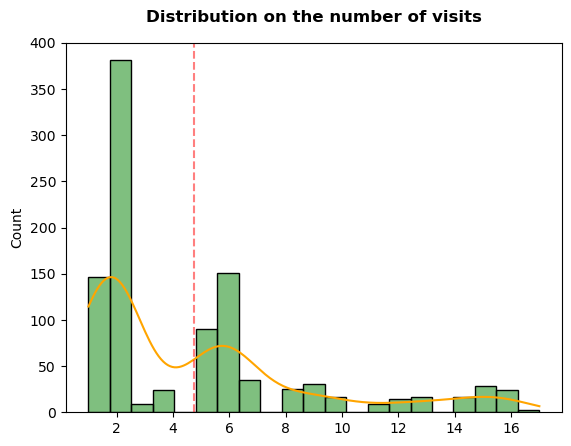

In [15]:
ax = sns.histplot(df_clinic.groupby("patient_id").size().values, color="green", kde=True)
ax.lines[0].set_color('orange')
# Red line is mean
plt.axvline(df_clinic.groupby("patient_id").size().describe()["mean"], color="red", alpha=0.5, linestyle="--")
plt.title("Distribution on the number of visits", fontweight="bold", pad=15)
plt.show()

In [16]:
df_clinic.filter(regex="updrs_*")

,updrs_1,updrs_2,updrs_3,updrs_4
0,10.0,6.0,15.0,NaN
1,10.0,7.0,25.0,NaN
2,8.0,10.0,34.0,NaN
3,8.0,9.0,30.0,0.0
4,10.0,10.0,41.0,0.0
...,...,...,...,...
4833,NaN,NaN,0.0,NaN
4834,5.0,16.0,31.0,0.0
4835,NaN,NaN,57.0,NaN
4836,10.0,6.0,24.0,0.0


In [17]:
df_eda = df_clinic.groupby("patient_id")["visit_month"].max()

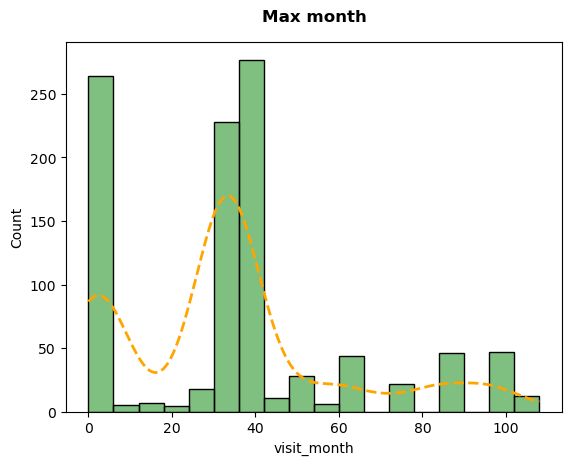

In [18]:
# df_eda.describe()
# df_eda.value_counts().sort_index()
ax = sns.histplot(df_eda, kde=True, color="green", line_kws={'linewidth': 2, 'linestyle': '--'})
ax.lines[0].set_color('orange')
plt.title(f"Max month", fontweight="bold", pad=15)
plt.show()

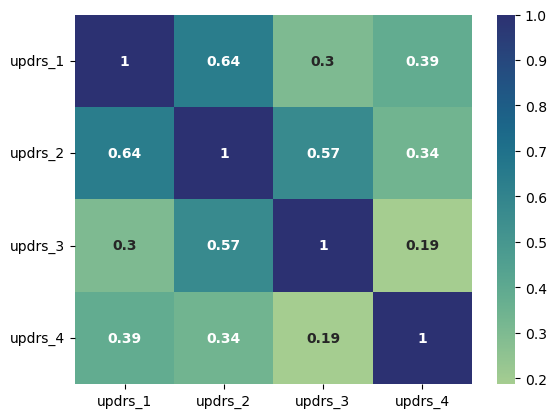

In [46]:
# Correlation among targets
sns.heatmap(df_clinic.filter(regex="updrs_*").dropna().corr(), cmap="crest", annot=True, annot_kws={"fontweight": "bold"})
plt.yticks(rotation=0)
plt.show()

In [19]:
df_eda = df_clinic.groupby("visit_month", as_index=False).mean().dropna()
df_eda.head(5)

,visit_month,patient_id,updrs_1,updrs_2,updrs_3,updrs_4,CSF
0,0,32284.550540,5.725108,5.734848,18.312684,1.186517,0.243376
1,3,33128.895652,5.513043,6.634783,20.482456,0.142857,1.000000
3,6,33402.718182,5.938636,6.670455,22.143836,1.427419,0.436364
4,9,33544.020202,6.080808,7.204082,20.474747,0.488372,1.000000
5,12,32921.261506,5.736402,5.765690,19.726891,0.953668,0.508368


### Stat

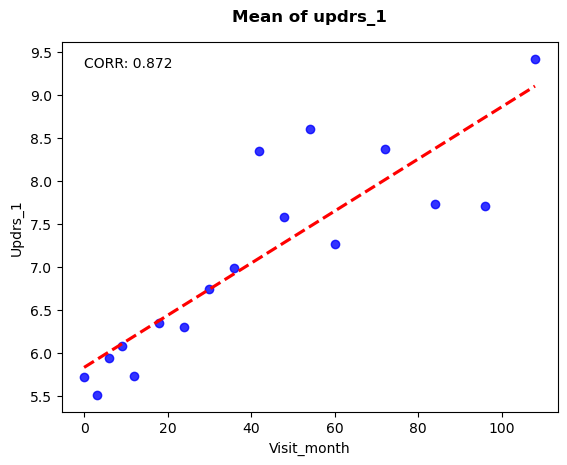

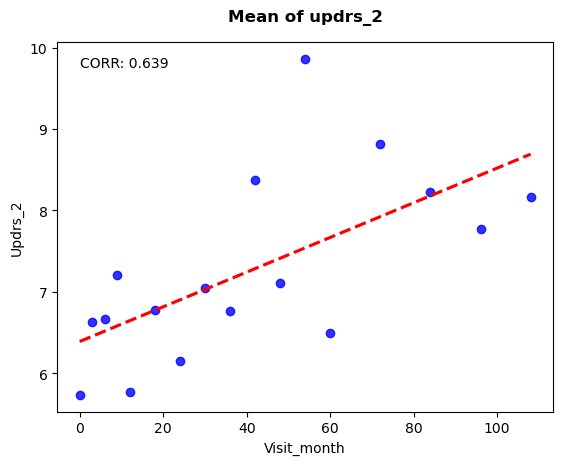

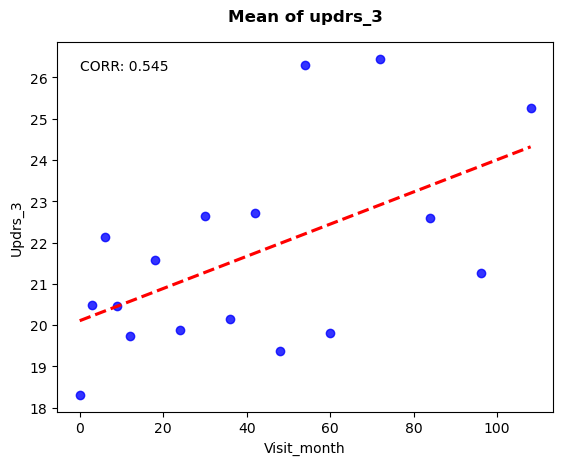

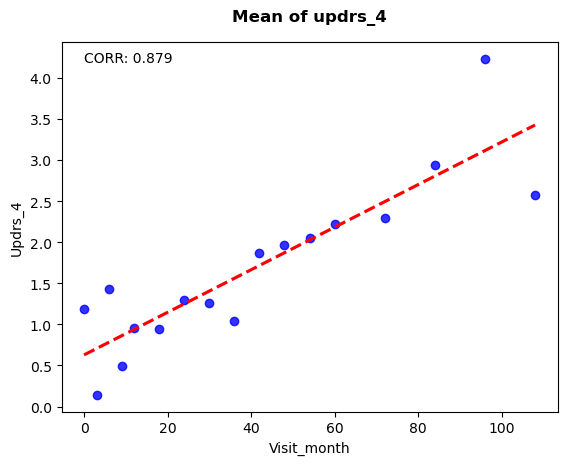

In [20]:
for i in range(4):    
    sns.regplot(x=df_eda["visit_month"].values, y=df_eda[f"updrs_{i+1}"].values, color="blue", ci=None, line_kws={"color": "red", "linestyle": "--"})
    plt.title(f"Mean of updrs_{i+1}", fontweight="bold", pad=15)
    plt.text(0, df_eda[f"updrs_{i+1}"].values.max() * 0.99, f'CORR: {round(df_eda.corr().loc["visit_month", f"updrs_{i+1}"], 3)}')
    plt.xlabel("Visit_month")
    plt.ylabel(f"Updrs_{i+1}")
    plt.show()

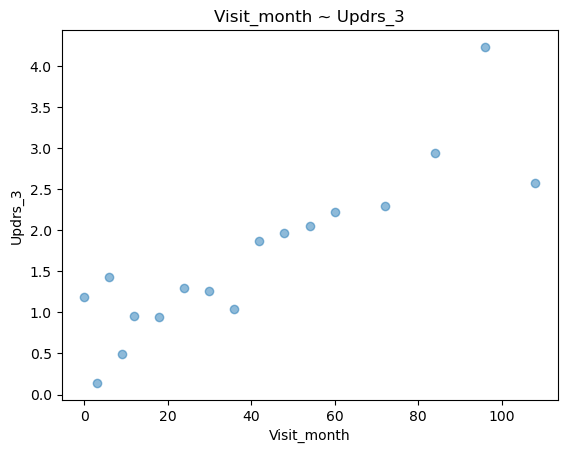

In [21]:
X = df_eda.visit_month.values
Y = df_eda.updrs_4.values

import matplotlib.pyplot as plt
plt.scatter(X,Y, alpha=0.5)
plt.title('Visit_month ~ Updrs_3')
plt.xlabel('Visit_month')
plt.ylabel('Updrs_3')
plt.show()

In [22]:
merged['updrs_1'] = merged['updrs_1'].fillna(0)
merged['updrs_2'] = merged['updrs_2'].fillna(0)
merged['updrs_3'] = merged['updrs_3'].fillna(0)
merged['updrs_4'] = merged['updrs_4'].fillna(0)

In [23]:
merged['updrs_1'] = merged.groupby('visit_month')['updrs_1'].mean()
merged['updrs_2'] = merged.groupby('visit_month')['updrs_2'].mean()
merged['updrs_3'] = merged.groupby('visit_month')['updrs_3'].mean()
merged['updrs_4'] = merged.groupby('visit_month')['updrs_4'].mean()

In [24]:
merged.corr()

,visit_month,patient_id,NPX,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4
visit_month,1.000000,-0.019664,-0.002580,-0.001524,NaN,NaN,NaN,NaN
patient_id,-0.019664,1.000000,-0.001744,-0.000536,NaN,NaN,NaN,NaN
NPX,-0.002580,-0.001744,1.000000,0.506847,0.570944,0.067298,0.112224,-0.006994
PeptideAbundance,-0.001524,-0.000536,0.506847,1.000000,0.263378,0.180323,0.203439,0.280635
updrs_1,NaN,NaN,0.570944,0.263378,1.000000,0.619616,0.415479,0.519364
updrs_2,NaN,NaN,0.067298,0.180323,0.619616,1.000000,0.737051,0.211919
updrs_3,NaN,NaN,0.112224,0.203439,0.415479,0.737051,1.000000,-0.034239
updrs_4,NaN,NaN,-0.006994,0.280635,0.519364,0.211919,-0.034239,1.000000


In [25]:
import numpy as np
# cov = (np.sum(X*Y) - len(X)*np.mean(X)*np.mean(Y)) / len(X)
# cov
np.cov(X, Y)[0,1]

29.279976764811625

In [26]:
np.corrcoef(X,Y)[0,1]

0.8789676582590035

In [27]:
import scipy.stats as stats
stats.pearsonr(X,Y)

PearsonRResult(statistic=0.8789676582590036, pvalue=3.400878222707922e-06)

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [29]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [30]:
lr.fit(X, Y)

LinearRegression()

In [31]:
print(lr.coef_[0])
print(lr.intercept_)

[0.02590929]
[0.62849614]


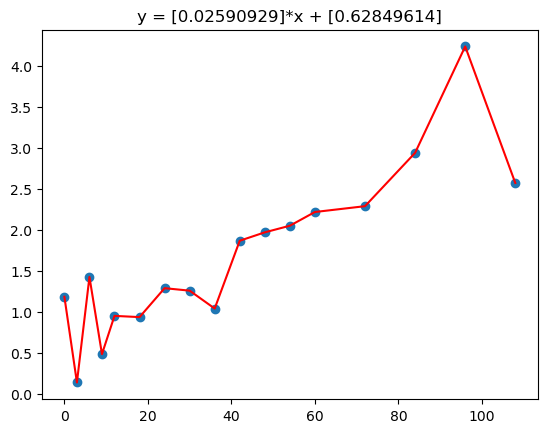

In [32]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.plot(X, Y, color='red')
plt.title('y = {}*x + {}'.format(lr.coef_[0], lr.intercept_))
plt.show()

In [33]:
import statsmodels.api as sm
results = sm.OLS(Y, sm.add_constant(X)).fit()

In [34]:
results.summary()

C:\Users\momsi\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     50.96
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           3.40e-06
Time:                        16:30:14   Log-Likelihood:                -10.863
No. Observations:                  17   AIC:                             25.73
Df Residuals:                      15   BIC:                             27.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6285      0.191      3.291      0.005       0.221       1.036
x1             0.0259      0.004      7.139      0.000       0.018       0.034
==============================================================================
Omnibus:                        2.271   Durbin-Watson:                   2.695
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                0.849
Skew:                           0.508   Prob(JB):                        0.654
Kurtosis:                       3.408   Cond. No.                         84.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
df_eda = df_clinic.dropna()

Two groups are difference ! -> pvalue: 0.00248


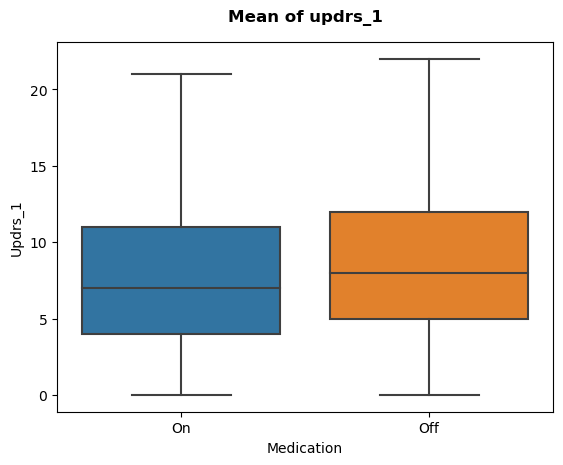

Two groups are difference ! -> pvalue: 0.0


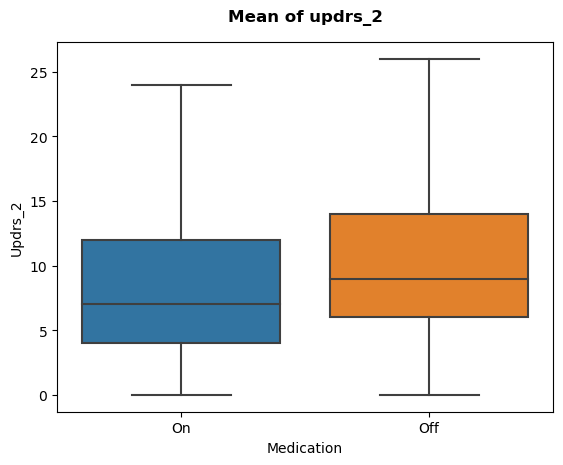

Two groups are difference ! -> pvalue: 0.0


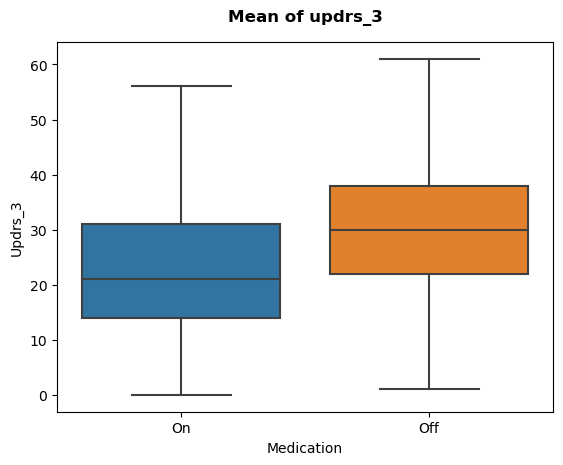

Two groups are difference ! -> pvalue: 0.00078


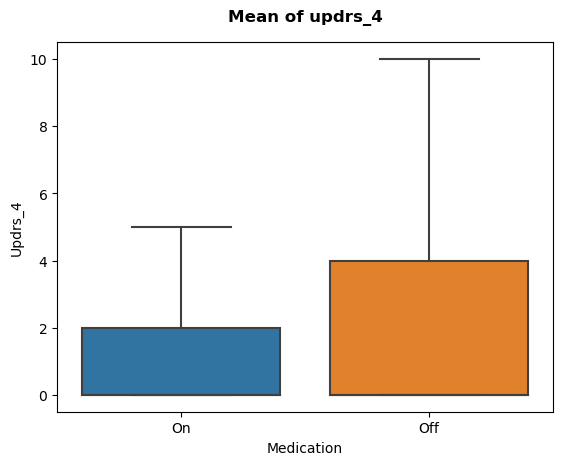

In [48]:
from scipy.stats import f_oneway
for i in range(4):    
    sns.boxplot(x=df_eda["medication"].values, y=df_eda[f"updrs_{i+1}"].values, showfliers=False)
    plt.title(f"Mean of updrs_{i+1}", fontweight="bold", pad=15)
    _, pvalue = f_oneway(df_eda.loc[df_eda["medication"] == "On", f"updrs_{i+1}"].values, df_eda.loc[df_eda["medication"] == "Off", f"updrs_{i+1}"].values)
    if pvalue < 0.05:
        print("Two groups are difference ! -> pvalue:", round(pvalue, 5))
    plt.xlabel("Medication")
    plt.ylabel(f"Updrs_{i+1}")
    plt.show()

In [49]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941744 entries, 0 to 941743
Data columns (total 12 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   visit_id                             941744 non-null  object 
 1   visit_month                          941744 non-null  int64  
 2   patient_id                           941744 non-null  int64  
 3   UniProt                              941744 non-null  object 
 4   NPX                                  941744 non-null  float64
 5   Peptide                              941744 non-null  object 
 6   PeptideAbundance                     941744 non-null  float64
 7   updrs_1                              15 non-null      float64
 8   updrs_2                              15 non-null      float64
 9   updrs_3                              15 non-null      float64
 10  updrs_4                              15 non-null      float64
 11  upd23b_clinic

In [50]:
months_of_interest = [6,12,24]
merged_filtered = merged[merged['visit_month'].isin(months_of_interest)]
merged_filtered.head(5)

,visit_id,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
171938,55_6,6,55,O00391,13163.6,NEQEQPLGQWHLS,13163.6,NaN,NaN,NaN,NaN,NaN
171939,55_6,6,55,O00533,630465.0,GNPEPTFSWTK,90643.1,NaN,NaN,NaN,NaN,NaN
171940,55_6,6,55,O00533,630465.0,IEIPSSVQQVPTIIK,147434.0,NaN,NaN,NaN,NaN,NaN
171941,55_6,6,55,O00533,630465.0,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,24320.6,NaN,NaN,NaN,NaN,NaN
171942,55_6,6,55,O00533,630465.0,SMEQNGPGLEYR,25532.9,NaN,NaN,NaN,NaN,NaN


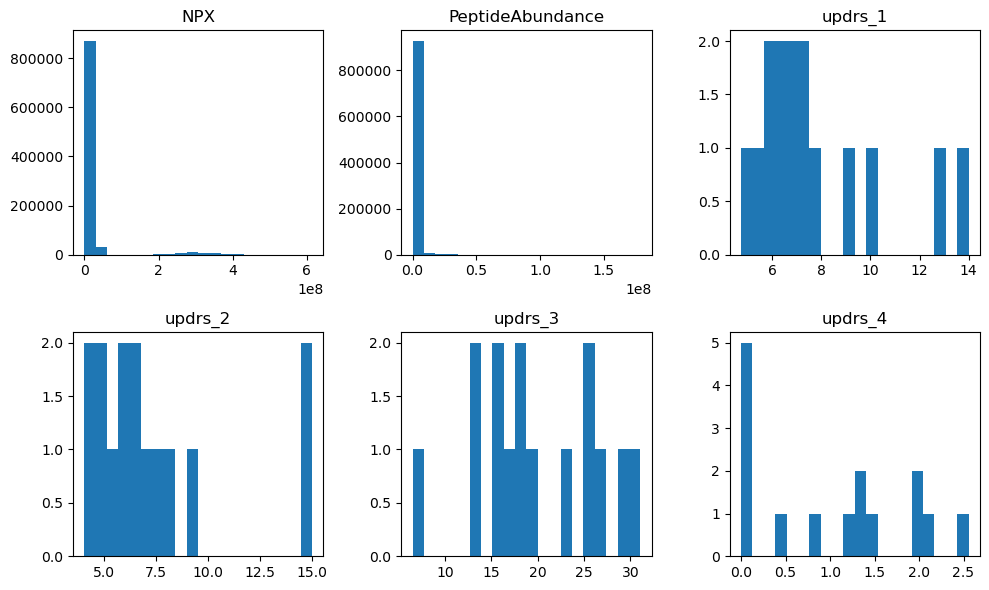

In [52]:
# Visualize NPX, PeptideAbundance, updrs_1, updrs_2, updrs_3, and updrs_4.

# Create a figure and axes for each variable
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 6))
axs = axs.flatten()

# Plot histograms for each variable
for i, col in enumerate(['NPX', 'PeptideAbundance', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']):
    axs[i].hist(merged[col].dropna(), bins = 20)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [55]:
merged['Peptide / Protein'] = merged['PeptideAbundance'] / merged['NPX']
merged

,visit_id,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,Peptide / Protein
0,55_0,0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.30,5.257559,4.069577,12.90878,0.413241,NaN,1.000000
1,55_0,0,55,O00533,732430.0,GNPEPTFSWTK,102060.00,NaN,NaN,NaN,NaN,NaN,0.139344
2,55_0,0,55,O00533,732430.0,IEIPSSVQQVPTIIK,174185.00,NaN,NaN,NaN,NaN,NaN,0.237818
3,55_0,0,55,O00533,732430.0,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90,6.000000,5.000000,25.00000,0.000000,NaN,0.037244
4,55_0,0,55,O00533,732430.0,SMEQNGPGLEYR,30838.70,NaN,NaN,NaN,NaN,NaN,0.042105
...,...,...,...,...,...,...,...,...,...,...,...,...,...
941739,58648_108,108,58648,Q9UHG2,369437.0,ILAGSADSEGVAAPR,202820.00,NaN,NaN,NaN,NaN,NaN,0.548998
941740,58648_108,108,58648,Q9UKV8,105830.0,SGNIPAGTTVDTK,105830.00,NaN,NaN,NaN,NaN,NaN,1.000000
941741,58648_108,108,58648,Q9Y646,21257.6,LALLVDTVGPR,21257.60,NaN,NaN,NaN,NaN,NaN,1.000000
941742,58648_108,108,58648,Q9Y6R7,17953.1,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26,NaN,NaN,NaN,NaN,NaN,0.285592


In [56]:
merged.describe()

,visit_month,patient_id,NPX,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4,Peptide / Protein
count,941744.000000,941744.000000,9.417440e+05,9.417440e+05,15.000000,15.000000,15.000000,15.000000,941744.000000
mean,26.771747,32682.203127,1.700905e+07,6.432814e+05,7.836177,7.377059,19.913494,1.021425,0.237079
std,22.889144,18608.454453,6.319169e+07,3.378418e+06,2.697360,3.316103,6.728245,0.897326,0.304005
min,0.000000,55.000000,8.460820e+01,1.099850e+01,4.730138,4.069577,6.522281,0.000000,0.000006
25%,6.000000,16574.000000,2.432950e+05,2.818738e+04,6.204723,5.260382,16.177381,0.060906,0.028978
50%,24.000000,29313.000000,9.928180e+05,7.435900e+04,6.801325,6.269912,18.229607,1.232366,0.099288
75%,48.000000,50611.000000,3.728860e+06,2.215240e+05,8.554819,7.801585,25.119676,1.701302,0.299806
max,108.000000,65043.000000,6.138510e+08,1.787520e+08,14.000000,15.000000,31.061077,2.556968,1.000000


In [57]:
merged['Peptide'].value_counts()

YKAAFTEC(UniMod_4)C(UniMod_4)QAADK    1068
IPTTFENGR                             1068
AIGYLNTGYQR                           1068
TLLSNLEEAK                            1068
NILTSNNIDVK                           1068
                                      ... 
HYEGSTVPEK                             583
SLEDQVEMLR                             571
TPSGLYLGTC(UniMod_4)ER                 569
EPQVYTLPPSRDELTK                       539
QALPQVR                                467
Name: Peptide, Length: 968, dtype: int64

In [58]:
# Pivot the data.
pivoted = merged.pivot(index = 'visit_id', columns = ['Peptide'], values = 'PeptideAbundance')

# See the pivoted data.
pivoted

Peptide,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,ADDKETC(UniMod_4)FAEEGK,ADDKETC(UniMod_4)FAEEGKK,ADDLGKGGNEESTKTGNAGSR,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,6580710.0,31204.4,7735070.0,NaN,NaN,NaN,46620.3,236144.0,NaN,NaN,...,202274.0,NaN,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,NaN,7207.30
10053_12,6333510.0,52277.6,5394390.0,NaN,NaN,NaN,57554.5,108298.0,45885.4,NaN,...,201009.0,NaN,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,7129640.0,61522.0,7011920.0,35984.7,17188.00,19787.3,36029.4,708729.0,5067790.0,30838.2,...,220728.0,NaN,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,7404780.0,46107.2,10610900.0,NaN,20910.20,66662.3,55253.9,79575.5,6201210.0,26720.0,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,13788300.0,56910.3,6906160.0,13785.5,11004.20,63672.7,36819.8,34160.9,2117430.0,15645.2,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,NaN,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,6312970.0,44462.7,12455000.0,11051.3,1163.18,43279.8,67743.5,325328.0,4666550.0,11038.5,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
942_12,11289900.0,46111.7,11297300.0,NaN,13894.10,53755.0,40289.3,565112.0,NaN,26495.8,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,NaN
942_24,10161900.0,32145.0,12388000.0,25869.2,17341.80,48625.5,45223.9,84448.0,4684800.0,23150.2,...,185428.0,5554.53,NaN,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60


In [59]:
# Add visit_month, the 4 scores, and medication status.
df = pd.merge(clinical, pivoted, on = 'visit_id', how = 'right').set_index('visit_id')
df

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,10053,0,3.0,0.0,13.0,0.0,NaN,6580710.0,31204.4,7735070.0,...,202274.0,NaN,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,NaN,7207.30
10053_12,10053,12,4.0,2.0,8.0,0.0,NaN,6333510.0,52277.6,5394390.0,...,201009.0,NaN,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,10053,18,2.0,2.0,0.0,0.0,NaN,7129640.0,61522.0,7011920.0,...,220728.0,NaN,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,10138,12,3.0,6.0,31.0,0.0,On,7404780.0,46107.2,10610900.0,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,10138,24,4.0,7.0,19.0,10.0,On,13788300.0,56910.3,6906160.0,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,NaN,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,8699,24,11.0,10.0,13.0,2.0,On,6312970.0,44462.7,12455000.0,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
942_12,942,12,5.0,2.0,25.0,0.0,NaN,11289900.0,46111.7,11297300.0,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,NaN
942_24,942,24,2.0,3.0,23.0,NaN,NaN,10161900.0,32145.0,12388000.0,...,185428.0,5554.53,NaN,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60


In [60]:
# Insert the visit_month column to the desired position.
df.insert(6, 'visit_month', df.pop('visit_month'))
df

,patient_id,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,visit_month,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,10053,3.0,0.0,13.0,0.0,NaN,0,6580710.0,31204.4,7735070.0,...,202274.0,NaN,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,NaN,7207.30
10053_12,10053,4.0,2.0,8.0,0.0,NaN,12,6333510.0,52277.6,5394390.0,...,201009.0,NaN,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,10053,2.0,2.0,0.0,0.0,NaN,18,7129640.0,61522.0,7011920.0,...,220728.0,NaN,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,10138,3.0,6.0,31.0,0.0,On,12,7404780.0,46107.2,10610900.0,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,10138,4.0,7.0,19.0,10.0,On,24,13788300.0,56910.3,6906160.0,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,NaN,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,8699,11.0,10.0,13.0,2.0,On,24,6312970.0,44462.7,12455000.0,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
942_12,942,5.0,2.0,25.0,0.0,NaN,12,11289900.0,46111.7,11297300.0,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,NaN
942_24,942,2.0,3.0,23.0,NaN,NaN,24,10161900.0,32145.0,12388000.0,...,185428.0,5554.53,NaN,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60


In [61]:
df = df.drop('patient_id', axis = 1)
df

,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,visit_month,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,3.0,0.0,13.0,0.0,NaN,0,6580710.0,31204.4,7735070.0,NaN,...,202274.0,NaN,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,NaN,7207.30
10053_12,4.0,2.0,8.0,0.0,NaN,12,6333510.0,52277.6,5394390.0,NaN,...,201009.0,NaN,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,2.0,2.0,0.0,0.0,NaN,18,7129640.0,61522.0,7011920.0,35984.7,...,220728.0,NaN,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,3.0,6.0,31.0,0.0,On,12,7404780.0,46107.2,10610900.0,NaN,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,4.0,7.0,19.0,10.0,On,24,13788300.0,56910.3,6906160.0,13785.5,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,NaN,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,11.0,10.0,13.0,2.0,On,24,6312970.0,44462.7,12455000.0,11051.3,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
942_12,5.0,2.0,25.0,0.0,NaN,12,11289900.0,46111.7,11297300.0,NaN,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,NaN
942_24,2.0,3.0,23.0,NaN,NaN,24,10161900.0,32145.0,12388000.0,25869.2,...,185428.0,5554.53,NaN,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60


In [62]:
# Check for NaN values in each column.
nan_count = df.isna().sum()
print(nan_count)

updrs_1                                  0
updrs_2                                  0
updrs_3                                 10
updrs_4                                499
upd23b_clinical_state_on_medication    616
                                      ... 
YVNKEIQNAVNGVK                           2
YWGVASFLQK                              23
YYC(UniMod_4)FQGNQFLR                    8
YYTYLIMNK                               80
YYWGGQYTWDMAK                          237
Length: 974, dtype: int64


In [63]:
# Replace NaN with 0 in the Peptides columns.
df.loc[:, 'AADDTWEPFASGK':] = df.loc[:, 'AADDTWEPFASGK':].fillna(0)
df

,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,visit_month,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,3.0,0.0,13.0,0.0,NaN,0,6580710.0,31204.4,7735070.0,0.0,...,202274.0,0.00,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,0.0,7207.30
10053_12,4.0,2.0,8.0,0.0,NaN,12,6333510.0,52277.6,5394390.0,0.0,...,201009.0,0.00,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,2.0,2.0,0.0,0.0,NaN,18,7129640.0,61522.0,7011920.0,35984.7,...,220728.0,0.00,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,3.0,6.0,31.0,0.0,On,12,7404780.0,46107.2,10610900.0,0.0,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,4.0,7.0,19.0,10.0,On,24,13788300.0,56910.3,6906160.0,13785.5,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,0.0,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,11.0,10.0,13.0,2.0,On,24,6312970.0,44462.7,12455000.0,11051.3,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
942_12,5.0,2.0,25.0,0.0,NaN,12,11289900.0,46111.7,11297300.0,0.0,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,0.00
942_24,2.0,3.0,23.0,NaN,NaN,24,10161900.0,32145.0,12388000.0,25869.2,...,185428.0,5554.53,0.0,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60


In [64]:
# Check for NaN values in each column.
nan_count = df.isna().sum()
print(nan_count)

updrs_1                                  0
updrs_2                                  0
updrs_3                                 10
updrs_4                                499
upd23b_clinical_state_on_medication    616
                                      ... 
YVNKEIQNAVNGVK                           0
YWGVASFLQK                               0
YYC(UniMod_4)FQGNQFLR                    0
YYTYLIMNK                                0
YYWGGQYTWDMAK                            0
Length: 974, dtype: int64


In [65]:
print('Medication Status')
print(df.upd23b_clinical_state_on_medication.value_counts())
print(f"On or Off: {df['upd23b_clinical_state_on_medication'].count()}")
print(f"No Information: {df['upd23b_clinical_state_on_medication'].isna().sum()}")

Medication Status
On     229
Off    223
Name: upd23b_clinical_state_on_medication, dtype: int64
On or Off: 452
No Information: 616


## Read Test Data

In [66]:
test_proteins = pd.read_csv('data/test/test_proteins.csv')
print('Test Proteins shape:',test_proteins.shape)
test_proteins.head()

Test Proteins shape: (453, 6)


,visit_id,visit_month,patient_id,UniProt,NPX,group_key
0,50423_0,0,50423,O00391,33127.90,0
1,50423_0,0,50423,O00533,490742.00,0
2,50423_0,0,50423,O00584,43615.30,0
3,50423_0,0,50423,O14773,16486.60,0
4,50423_0,0,50423,O14791,2882.42,0


In [67]:
test_peptides = pd.read_csv('data/test/test_peptides.csv')
print('Test Peptides shape:', test_peptides.shape)
test_peptides.head()

Test Peptides shape: (2057, 7)


,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,group_key
0,50423_0,0,50423,O00391,AHFSPSNIILDFPAAGSAAR,22226.3,0
1,50423_0,0,50423,O00391,NEQEQPLGQWHLS,10901.6,0
2,50423_0,0,50423,O00533,GNPEPTFSWTK,51499.4,0
3,50423_0,0,50423,O00533,IEIPSSVQQVPTIIK,125492.0,0
4,50423_0,0,50423,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,23174.2,0


In [68]:
test = pd.read_csv('data/test/test.csv')
print('Test shape:', test.shape)
test.head()

Test shape: (16, 6)


,visit_id,visit_month,patient_id,updrs_test,row_id,group_key
0,3342_0,0,3342,updrs_1,3342_0_updrs_1,0
1,3342_0,0,3342,updrs_2,3342_0_updrs_2,0
2,3342_0,0,3342,updrs_3,3342_0_updrs_3,0
3,3342_0,0,3342,updrs_4,3342_0_updrs_4,0
4,50423_0,0,50423,updrs_1,50423_0_updrs_1,0


In [69]:
sample_submission = pd.read_csv('data/test/sample_submission.csv')
print('Sample Submission shape:', sample_submission.shape)
sample_submission.head()

Sample Submission shape: (64, 3)


,prediction_id,rating,group_key
0,3342_0_updrs_1_plus_0_months,0,0
1,3342_0_updrs_1_plus_6_months,0,0
2,3342_0_updrs_1_plus_12_months,0,0
3,3342_0_updrs_1_plus_24_months,0,0
4,3342_0_updrs_2_plus_0_months,0,0


In [70]:
# Merge the proteins data and peptides data on the common columns.
test_merged_proteins_peptides = pd.merge(test_proteins, test_peptides, on = ['visit_id', 'visit_month', 'patient_id', 'UniProt'])

# Merge the merged protein-peptides data with the clinical data on the common columns.
test_merged = pd.merge(test_merged_proteins_peptides, test, on = ['visit_id', 'visit_month', 'patient_id'])

# Show the merged data.
test_merged

,visit_id,visit_month,patient_id,UniProt,NPX,group_key_x,Peptide,PeptideAbundance,group_key_y,updrs_test,row_id,group_key
0,50423_0,0,50423,O00391,33127.9,0,AHFSPSNIILDFPAAGSAAR,22226.30,0,updrs_1,50423_0_updrs_1,0
1,50423_0,0,50423,O00391,33127.9,0,AHFSPSNIILDFPAAGSAAR,22226.30,0,updrs_2,50423_0_updrs_2,0
2,50423_0,0,50423,O00391,33127.9,0,AHFSPSNIILDFPAAGSAAR,22226.30,0,updrs_3,50423_0_updrs_3,0
3,50423_0,0,50423,O00391,33127.9,0,AHFSPSNIILDFPAAGSAAR,22226.30,0,updrs_4,50423_0_updrs_4,0
4,50423_0,0,50423,O00391,33127.9,0,NEQEQPLGQWHLS,10901.60,0,updrs_1,50423_0_updrs_1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8223,3342_6,6,3342,Q9Y6R7,14624.5,6,AGC(UniMod_4)VAESTAVC(UniMod_4)R,4253.17,6,updrs_4,3342_6_updrs_4,6
8224,3342_6,6,3342,Q9Y6R7,14624.5,6,GATTSPGVYELSSR,10371.30,6,updrs_1,3342_6_updrs_1,6
8225,3342_6,6,3342,Q9Y6R7,14624.5,6,GATTSPGVYELSSR,10371.30,6,updrs_2,3342_6_updrs_2,6
8226,3342_6,6,3342,Q9Y6R7,14624.5,6,GATTSPGVYELSSR,10371.30,6,updrs_3,3342_6_updrs_3,6


In [71]:
test_merged.shape

(8228, 12)

In [72]:
test_merged['prediction_id'] = test_merged.apply(lambda x: '{}_plus_{}months'.format(x['row_id'], x['visit_month']), axis = 1)
test_merged

,visit_id,visit_month,patient_id,UniProt,NPX,group_key_x,Peptide,PeptideAbundance,group_key_y,updrs_test,row_id,group_key,prediction_id
0,50423_0,0,50423,O00391,33127.9,0,AHFSPSNIILDFPAAGSAAR,22226.30,0,updrs_1,50423_0_updrs_1,0,50423_0_updrs_1_plus_0months
1,50423_0,0,50423,O00391,33127.9,0,AHFSPSNIILDFPAAGSAAR,22226.30,0,updrs_2,50423_0_updrs_2,0,50423_0_updrs_2_plus_0months
2,50423_0,0,50423,O00391,33127.9,0,AHFSPSNIILDFPAAGSAAR,22226.30,0,updrs_3,50423_0_updrs_3,0,50423_0_updrs_3_plus_0months
3,50423_0,0,50423,O00391,33127.9,0,AHFSPSNIILDFPAAGSAAR,22226.30,0,updrs_4,50423_0_updrs_4,0,50423_0_updrs_4_plus_0months
4,50423_0,0,50423,O00391,33127.9,0,NEQEQPLGQWHLS,10901.60,0,updrs_1,50423_0_updrs_1,0,50423_0_updrs_1_plus_0months
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8223,3342_6,6,3342,Q9Y6R7,14624.5,6,AGC(UniMod_4)VAESTAVC(UniMod_4)R,4253.17,6,updrs_4,3342_6_updrs_4,6,3342_6_updrs_4_plus_6months
8224,3342_6,6,3342,Q9Y6R7,14624.5,6,GATTSPGVYELSSR,10371.30,6,updrs_1,3342_6_updrs_1,6,3342_6_updrs_1_plus_6months
8225,3342_6,6,3342,Q9Y6R7,14624.5,6,GATTSPGVYELSSR,10371.30,6,updrs_2,3342_6_updrs_2,6,3342_6_updrs_2_plus_6months
8226,3342_6,6,3342,Q9Y6R7,14624.5,6,GATTSPGVYELSSR,10371.30,6,updrs_3,3342_6_updrs_3,6,3342_6_updrs_3_plus_6months


In [73]:
test_merged['Peptide / Protein'] = test_merged['PeptideAbundance'] / test_merged['NPX']
test_merged

,visit_id,visit_month,patient_id,UniProt,NPX,group_key_x,Peptide,PeptideAbundance,group_key_y,updrs_test,row_id,group_key,prediction_id,Peptide / Protein
0,50423_0,0,50423,O00391,33127.9,0,AHFSPSNIILDFPAAGSAAR,22226.30,0,updrs_1,50423_0_updrs_1,0,50423_0_updrs_1_plus_0months,0.670924
1,50423_0,0,50423,O00391,33127.9,0,AHFSPSNIILDFPAAGSAAR,22226.30,0,updrs_2,50423_0_updrs_2,0,50423_0_updrs_2_plus_0months,0.670924
2,50423_0,0,50423,O00391,33127.9,0,AHFSPSNIILDFPAAGSAAR,22226.30,0,updrs_3,50423_0_updrs_3,0,50423_0_updrs_3_plus_0months,0.670924
3,50423_0,0,50423,O00391,33127.9,0,AHFSPSNIILDFPAAGSAAR,22226.30,0,updrs_4,50423_0_updrs_4,0,50423_0_updrs_4_plus_0months,0.670924
4,50423_0,0,50423,O00391,33127.9,0,NEQEQPLGQWHLS,10901.60,0,updrs_1,50423_0_updrs_1,0,50423_0_updrs_1_plus_0months,0.329076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8223,3342_6,6,3342,Q9Y6R7,14624.5,6,AGC(UniMod_4)VAESTAVC(UniMod_4)R,4253.17,6,updrs_4,3342_6_updrs_4,6,3342_6_updrs_4_plus_6months,0.290825
8224,3342_6,6,3342,Q9Y6R7,14624.5,6,GATTSPGVYELSSR,10371.30,6,updrs_1,3342_6_updrs_1,6,3342_6_updrs_1_plus_6months,0.709173
8225,3342_6,6,3342,Q9Y6R7,14624.5,6,GATTSPGVYELSSR,10371.30,6,updrs_2,3342_6_updrs_2,6,3342_6_updrs_2_plus_6months,0.709173
8226,3342_6,6,3342,Q9Y6R7,14624.5,6,GATTSPGVYELSSR,10371.30,6,updrs_3,3342_6_updrs_3,6,3342_6_updrs_3_plus_6months,0.709173


In [74]:
# Pivot the data
test_pivoted = test_merged.pivot(index = 'prediction_id', columns = ['Peptide'], values = 'PeptideAbundance')

# See the pivoted data
test_pivoted

Peptide,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,AAVYHHFISDGVRK,AC(UniMod_4)DGINDC(UniMod_4)GDQSDELC(UniMod_4)C(UniMod_4)K,AC(UniMod_4)EPGVDYVYK,...,YSSDYFQAPSDYR,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
prediction_id,,,,,,,,,,,,,,,,,,,,,
3342_6_updrs_1_plus_6months,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,58295.7,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
3342_6_updrs_2_plus_6months,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,58295.7,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
3342_6_updrs_3_plus_6months,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,58295.7,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
3342_6_updrs_4_plus_6months,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,58295.7,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
50423_0_updrs_1_plus_0months,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,75916.4,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23
50423_0_updrs_2_plus_0months,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,75916.4,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23
50423_0_updrs_3_plus_0months,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,75916.4,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23
50423_0_updrs_4_plus_0months,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,75916.4,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23


In [75]:
# Check for NaN values in each column.
nan_count = test_pivoted.isna().sum()
print(nan_count)

Peptide
AADDTWEPFASGK                                       0
AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K    0
AAFTEC(UniMod_4)C(UniMod_4)QAADK                    0
AANEVSSADVK                                         0
AATGEC(UniMod_4)TATVGKR                             0
                                                   ..
YVNKEIQNAVNGVK                                      0
YWGVASFLQK                                          0
YYC(UniMod_4)FQGNQFLR                               0
YYTYLIMNK                                           0
YYWGGQYTWDMAK                                       0
Length: 1077, dtype: int64


In [76]:
# Replace NaN with 0 in the Peptides columns.
test_pivoted.loc[:, 'AADDTWEPFASGK':] = test_pivoted.loc[:, 'AADDTWEPFASGK':].fillna(0)
test_pivoted

Peptide,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,AAVYHHFISDGVRK,AC(UniMod_4)DGINDC(UniMod_4)GDQSDELC(UniMod_4)C(UniMod_4)K,AC(UniMod_4)EPGVDYVYK,...,YSSDYFQAPSDYR,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
prediction_id,,,,,,,,,,,,,,,,,,,,,
3342_6_updrs_1_plus_6months,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,58295.7,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
3342_6_updrs_2_plus_6months,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,58295.7,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
3342_6_updrs_3_plus_6months,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,58295.7,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
3342_6_updrs_4_plus_6months,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,58295.7,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
50423_0_updrs_1_plus_0months,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,75916.4,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23
50423_0_updrs_2_plus_0months,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,75916.4,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23
50423_0_updrs_3_plus_0months,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,75916.4,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23
50423_0_updrs_4_plus_0months,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,75916.4,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23


In [77]:
# We need to remove duplicates by patient_id.
index_list = list(test_pivoted.index)
patient_id = []
for i in range(len(test_pivoted)):
    element = index_list[i].split('_')[0]
    patient_id.append(element)
    
patient_id

['3342', '3342', '3342', '3342', '50423', '50423', '50423', '50423']

In [78]:
test_pivoted['patient_id'] = patient_id
test_pivoted

Peptide,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,AAVYHHFISDGVRK,AC(UniMod_4)DGINDC(UniMod_4)GDQSDELC(UniMod_4)C(UniMod_4)K,AC(UniMod_4)EPGVDYVYK,...,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK,patient_id
prediction_id,,,,,,,,,,,,,,,,,,,,,
3342_6_updrs_1_plus_6months,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,58295.7,...,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60,3342
3342_6_updrs_2_plus_6months,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,58295.7,...,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60,3342
3342_6_updrs_3_plus_6months,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,58295.7,...,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60,3342
3342_6_updrs_4_plus_6months,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,58295.7,...,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60,3342
50423_0_updrs_1_plus_0months,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,75916.4,...,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23,50423
50423_0_updrs_2_plus_0months,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,75916.4,...,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23,50423
50423_0_updrs_3_plus_0months,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,75916.4,...,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23,50423
50423_0_updrs_4_plus_0months,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,75916.4,...,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23,50423


In [79]:
test_pivoted = test_pivoted.drop_duplicates(subset = 'patient_id')
patient_id = test_pivoted.pop('patient_id')
test_pivoted.insert(0, 'patient_id', patient_id)
test_pivoted

Peptide,patient_id,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,AAVYHHFISDGVRK,AC(UniMod_4)DGINDC(UniMod_4)GDQSDELC(UniMod_4)C(UniMod_4)K,...,YSSDYFQAPSDYR,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
prediction_id,,,,,,,,,,,,,,,,,,,,,
3342_6_updrs_1_plus_6months,3342,7579140.0,74133.6,7580720.0,45426.9,10180.3,85589.0,39353.0,67733.7,3581.33,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
50423_0_updrs_1_plus_0months,50423,11087200.0,53998.5,9937660.0,25876.8,8013.8,42875.8,60326.2,63397.4,7721.18,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23


In [80]:
# We need to crate visit_month in sample submission.
index_list = list(sample_submission.prediction_id)
patient_id = []
for i in range(len(sample_submission)):
    element = index_list[i].split('_')[0]
    patient_id.append(element)
    
print(patient_id)

['3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '3342', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423', '50423']


In [81]:
sample_submission['patient_id'] = patient_id
sample_submission

,prediction_id,rating,group_key,patient_id
0,3342_0_updrs_1_plus_0_months,0,0,3342
1,3342_0_updrs_1_plus_6_months,0,0,3342
2,3342_0_updrs_1_plus_12_months,0,0,3342
3,3342_0_updrs_1_plus_24_months,0,0,3342
4,3342_0_updrs_2_plus_0_months,0,0,3342
...,...,...,...,...
59,50423_6_updrs_3_plus_24_months,0,6,50423
60,50423_6_updrs_4_plus_0_months,0,6,50423
61,50423_6_updrs_4_plus_6_months,0,6,50423
62,50423_6_updrs_4_plus_12_months,0,6,50423


In [82]:
# We need to crate updrs in sample submission.
index_list = list(sample_submission.prediction_id)
updrs = []
for i in range(len(sample_submission)):
    element = index_list[i].split('_')[3]
    updrs.append(element)
    
print(updrs)

['1', '1', '1', '1', '2', '2', '2', '2', '3', '3', '3', '3', '4', '4', '4', '4', '1', '1', '1', '1', '2', '2', '2', '2', '3', '3', '3', '3', '4', '4', '4', '4', '1', '1', '1', '1', '2', '2', '2', '2', '3', '3', '3', '3', '4', '4', '4', '4', '1', '1', '1', '1', '2', '2', '2', '2', '3', '3', '3', '3', '4', '4', '4', '4']


In [83]:
sample_submission['updrs'] = updrs
sample_submission

,prediction_id,rating,group_key,patient_id,updrs
0,3342_0_updrs_1_plus_0_months,0,0,3342,1
1,3342_0_updrs_1_plus_6_months,0,0,3342,1
2,3342_0_updrs_1_plus_12_months,0,0,3342,1
3,3342_0_updrs_1_plus_24_months,0,0,3342,1
4,3342_0_updrs_2_plus_0_months,0,0,3342,2
...,...,...,...,...,...
59,50423_6_updrs_3_plus_24_months,0,6,50423,3
60,50423_6_updrs_4_plus_0_months,0,6,50423,4
61,50423_6_updrs_4_plus_6_months,0,6,50423,4
62,50423_6_updrs_4_plus_12_months,0,6,50423,4


In [84]:
# We need to crate patient_id in sample submission.
index_list = list(sample_submission.prediction_id)
visit_month = []
for i in range(len(sample_submission)):
    element = index_list[i].split('_')[-2]
    visit_month.append(element)
    
print(visit_month)

['0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24', '0', '6', '12', '24']


In [85]:
sample_submission['visit_month'] = visit_month
sample_submission

,prediction_id,rating,group_key,patient_id,updrs,visit_month
0,3342_0_updrs_1_plus_0_months,0,0,3342,1,0
1,3342_0_updrs_1_plus_6_months,0,0,3342,1,6
2,3342_0_updrs_1_plus_12_months,0,0,3342,1,12
3,3342_0_updrs_1_plus_24_months,0,0,3342,1,24
4,3342_0_updrs_2_plus_0_months,0,0,3342,2,0
...,...,...,...,...,...,...
59,50423_6_updrs_3_plus_24_months,0,6,50423,3,24
60,50423_6_updrs_4_plus_0_months,0,6,50423,4,0
61,50423_6_updrs_4_plus_6_months,0,6,50423,4,6
62,50423_6_updrs_4_plus_12_months,0,6,50423,4,12


In [86]:
# Merge the data and sample_submission, while keeping the order of rows of sample_submission.
test_df = pd.merge(sample_submission, test_pivoted, on = ['patient_id'], how = 'left')
test_df

,prediction_id,rating,group_key,patient_id,updrs,visit_month,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,...,YSSDYFQAPSDYR,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
0,3342_0_updrs_1_plus_0_months,0,0,3342,1,0,7579140.0,74133.6,7580720.0,45426.9,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
1,3342_0_updrs_1_plus_6_months,0,0,3342,1,6,7579140.0,74133.6,7580720.0,45426.9,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
2,3342_0_updrs_1_plus_12_months,0,0,3342,1,12,7579140.0,74133.6,7580720.0,45426.9,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
3,3342_0_updrs_1_plus_24_months,0,0,3342,1,24,7579140.0,74133.6,7580720.0,45426.9,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
4,3342_0_updrs_2_plus_0_months,0,0,3342,2,0,7579140.0,74133.6,7580720.0,45426.9,...,31145.7,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,50423_6_updrs_3_plus_24_months,0,6,50423,3,24,11087200.0,53998.5,9937660.0,25876.8,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23
60,50423_6_updrs_4_plus_0_months,0,6,50423,4,0,11087200.0,53998.5,9937660.0,25876.8,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23
61,50423_6_updrs_4_plus_6_months,0,6,50423,4,6,11087200.0,53998.5,9937660.0,25876.8,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23
62,50423_6_updrs_4_plus_12_months,0,6,50423,4,12,11087200.0,53998.5,9937660.0,25876.8,...,39620.5,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23


In [87]:
(test_df['prediction_id'] == sample_submission['prediction_id']).sum()

64

In [88]:
len(list(df.columns[5:].values))

969

In [89]:
len(list(test_df.columns[6:].values))

1077

In [90]:
# Drop upd23b_clinical_state_on_medication column from the previous merged train dataset df.
df = df.drop('upd23b_clinical_state_on_medication', axis = 1)
df

,updrs_1,updrs_2,updrs_3,updrs_4,visit_month,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,3.0,0.0,13.0,0.0,0,6580710.0,31204.4,7735070.0,0.0,0.00,...,202274.0,0.00,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,0.0,7207.30
10053_12,4.0,2.0,8.0,0.0,12,6333510.0,52277.6,5394390.0,0.0,0.00,...,201009.0,0.00,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,2.0,2.0,0.0,0.0,18,7129640.0,61522.0,7011920.0,35984.7,17188.00,...,220728.0,0.00,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,3.0,6.0,31.0,0.0,12,7404780.0,46107.2,10610900.0,0.0,20910.20,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,4.0,7.0,19.0,10.0,24,13788300.0,56910.3,6906160.0,13785.5,11004.20,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,0.0,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,11.0,10.0,13.0,2.0,24,6312970.0,44462.7,12455000.0,11051.3,1163.18,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
942_12,5.0,2.0,25.0,0.0,12,11289900.0,46111.7,11297300.0,0.0,13894.10,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,0.00
942_24,2.0,3.0,23.0,NaN,24,10161900.0,32145.0,12388000.0,25869.2,17341.80,...,185428.0,5554.53,0.0,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60


In [91]:
# If a peptide in the train dataset does not exist in the test dataset, remove it.
remove_train = []
for i in range(len(list(df.columns[5:].values))):
    if list(df.columns[5:].values)[i] not in list(test_df.columns[6:].values):
        remove_train.append(list(df.columns[5:].values)[i])
        
remove_train

['C(UniMod_4)C(UniMod_4)VEC(UniMod_4)PPC(UniMod_4)PAPPVAGPSVFLFPPKPK',
 'DALSSVQESQVAQQAR',
 'DC(UniMod_4)GSVDGVIKEVNVSPC(UniMod_4)PTQPC(UniMod_4)QLSK',
 'DRLDEVKEQVAEVR',
 'DSGVPDRFSGSGSGTDFTLK',
 'DYVSQFEGSALGK',
 'EKLQDEDLGFL',
 'EPQVYTLPPSRDELTK',
 'FSALEVDETYVPK',
 'GGTLGTPQTGSENDALYEYLR',
 'HGNVAEGETKPDPDVTER',
 'LAAC(UniMod_4)GPPPVAPPAAVAAVAGGAR',
 'LEPGQQEEYYR',
 'LYQQHGAGLFDVTR',
 'QALNTDYLDSDYQR',
 'QALPQVR',
 'QQLVETHMAR',
 'RYIETDPANRDR',
 'SLEDQVEMLR',
 'TINPAVDHC(UniMod_4)C(UniMod_4)K',
 'TPVSDRVTK',
 'TSPVDEKALQDQLVLVAAK',
 'VAHQLQALR',
 'VPEEDLKR',
 'VSEADIQR']

In [92]:
df = df.drop(remove_train, axis = 1)
df

,updrs_1,updrs_2,updrs_3,updrs_4,visit_month,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,3.0,0.0,13.0,0.0,0,6580710.0,31204.4,7735070.0,0.0,0.00,...,202274.0,0.00,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,0.0,7207.30
10053_12,4.0,2.0,8.0,0.0,12,6333510.0,52277.6,5394390.0,0.0,0.00,...,201009.0,0.00,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,2.0,2.0,0.0,0.0,18,7129640.0,61522.0,7011920.0,35984.7,17188.00,...,220728.0,0.00,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,3.0,6.0,31.0,0.0,12,7404780.0,46107.2,10610900.0,0.0,20910.20,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,4.0,7.0,19.0,10.0,24,13788300.0,56910.3,6906160.0,13785.5,11004.20,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,0.0,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,11.0,10.0,13.0,2.0,24,6312970.0,44462.7,12455000.0,11051.3,1163.18,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
942_12,5.0,2.0,25.0,0.0,12,11289900.0,46111.7,11297300.0,0.0,13894.10,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,0.00
942_24,2.0,3.0,23.0,NaN,24,10161900.0,32145.0,12388000.0,25869.2,17341.80,...,185428.0,5554.53,0.0,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60


In [93]:
# If a peptide in the test dataset does not exist in the train dataset, remove it.
remove_test = []
for i in range(len(list(test_df.columns[6:].values))):
    if list(test_df.columns[6:].values)[i] not in list(df.columns[5:].values):
        remove_test.append(list(test_df.columns[6:].values)[i])
        
remove_test

['AAVYHHFISDGVRK',
 'AC(UniMod_4)DGINDC(UniMod_4)GDQSDELC(UniMod_4)C(UniMod_4)K',
 'AC(UniMod_4)EPGVDYVYK',
 'AEAQAQYSAAVAK',
 'AHFSPSNIILDFPAAGSAAR',
 'AIINLAVYGK',
 'APLQGTLLGYR',
 'APSVPAAEPEYPK',
 'AVC(UniMod_4)VLKGDGPVQGIINFEQK',
 'C(UniMod_4)C(UniMod_4)TESLVNRRPC(UniMod_4)FSALEVDETYVPK',
 'C(UniMod_4)DEWSVNSVGKIEC(UniMod_4)VSAETTEDC(UniMod_4)IAK',
 'C(UniMod_4)FEPQLLR',
 'C(UniMod_4)VC(UniMod_4)PVSNAM(UniMod_35)C(UniMod_4)R',
 'DGSTIPIAK',
 'DIC(UniMod_4)EEQVNSLPGSITK',
 'DKATFGC(UniMod_4)HDGYSLDGPEEIEC(UniMod_4)TK',
 'DPNGLPPEAQK',
 'DRDGNTLTYYR',
 'DSAHGFLK',
 'DSTGTYTC(UniMod_4)VAR',
 'EDGGGWWYNR',
 'EFQLFSSPHGKDLLFK',
 'EGDALELTC(UniMod_4)EAIGKPQPVMVTWVR',
 'EGTC(UniMod_4)PEAPTDEC(UniMod_4)KPVKWC(UniMod_4)ALSHHER',
 'ETPAATEAPSSTPK',
 'EVPLNTIIFM(UniMod_35)GR',
 'EYLGAIC(UniMod_4)SC(UniMod_4)TC(UniMod_4)FGGQR',
 'FISLGEAC(UniMod_4)K',
 'FNAVLTNPQGDYDTSTGK',
 'FPVFMGR',
 'GDGPVQGIINFEQK',
 'GDSPASSKPISINYR',
 'GELDC(UniMod_4)HQLADSFRE',
 'GEQEHSQQKEEEEEMAVVPQGLFR',
 'GFNC(UniM

In [94]:
test_df = test_df.drop(remove_test, axis = 1)
test_df

,prediction_id,rating,group_key,patient_id,updrs,visit_month,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
0,3342_0_updrs_1_plus_0_months,0,0,3342,1,0,7579140.0,74133.6,7580720.0,45426.9,...,219474.0,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
1,3342_0_updrs_1_plus_6_months,0,0,3342,1,6,7579140.0,74133.6,7580720.0,45426.9,...,219474.0,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
2,3342_0_updrs_1_plus_12_months,0,0,3342,1,12,7579140.0,74133.6,7580720.0,45426.9,...,219474.0,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
3,3342_0_updrs_1_plus_24_months,0,0,3342,1,24,7579140.0,74133.6,7580720.0,45426.9,...,219474.0,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
4,3342_0_updrs_2_plus_0_months,0,0,3342,2,0,7579140.0,74133.6,7580720.0,45426.9,...,219474.0,10359.8,3657330.0,47100.5,1007150.0,74598.6,127126.0,210763.0,46207.2,22031.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,50423_6_updrs_3_plus_24_months,0,6,50423,3,24,11087200.0,53998.5,9937660.0,25876.8,...,257227.0,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23
60,50423_6_updrs_4_plus_0_months,0,6,50423,4,0,11087200.0,53998.5,9937660.0,25876.8,...,257227.0,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23
61,50423_6_updrs_4_plus_6_months,0,6,50423,4,6,11087200.0,53998.5,9937660.0,25876.8,...,257227.0,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23
62,50423_6_updrs_4_plus_12_months,0,6,50423,4,12,11087200.0,53998.5,9937660.0,25876.8,...,257227.0,15370.0,4137590.0,15217.0,83253.9,110941.0,112251.0,221372.0,46557.4,8527.23


## Create, Train, and Evaluate Linear Regression Model

### updrs_1

In [95]:
from sklearn.feature_selection import SelectKBest, f_regression

# Separate the dataset for updrs_1.
df_updrs1 = df[['updrs_1'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs1 = df_updrs1.iloc[:, 1:]
y_updrs1 = df_updrs1.iloc[:, 0]

# Select the top 10 features based on the F-test score.
selector1 = SelectKBest(score_func = f_regression, k = 10)

# Fit the selector on the independent variables and target variable.
X_new1 = selector1.fit_transform(X_updrs1, y_updrs1)

# Get the indices of the selected features.
selected_indices1 = selector1.get_support(indices = True)

# Get the names of the selected features.
selected_X_updrs1 = X_updrs1.columns[selected_indices1]

In [96]:
df_updrs1

,updrs_1,visit_month,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,ADDKETC(UniMod_4)FAEEGK,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,3.0,0,6580710.0,31204.4,7735070.0,0.0,0.00,0.0,46620.3,236144.0,...,202274.0,0.00,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,0.0,7207.30
10053_12,4.0,12,6333510.0,52277.6,5394390.0,0.0,0.00,0.0,57554.5,108298.0,...,201009.0,0.00,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,2.0,18,7129640.0,61522.0,7011920.0,35984.7,17188.00,19787.3,36029.4,708729.0,...,220728.0,0.00,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,3.0,12,7404780.0,46107.2,10610900.0,0.0,20910.20,66662.3,55253.9,79575.5,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,4.0,24,13788300.0,56910.3,6906160.0,13785.5,11004.20,63672.7,36819.8,34160.9,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,0.0,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,11.0,24,6312970.0,44462.7,12455000.0,11051.3,1163.18,43279.8,67743.5,325328.0,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
942_12,5.0,12,11289900.0,46111.7,11297300.0,0.0,13894.10,53755.0,40289.3,565112.0,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,0.00
942_24,2.0,24,10161900.0,32145.0,12388000.0,25869.2,17341.80,48625.5,45223.9,84448.0,...,185428.0,5554.53,0.0,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60


In [97]:
# the selected features
X_new1

array([[    0.  , 60980.2 ,     0.  , ...,     0.  ,     0.  ,     0.  ],
       [    0.  , 52614.2 ,     0.  , ...,     0.  ,     0.  , 16311.6 ],
       [    0.  , 67865.  ,  6847.04, ...,     0.  ,     0.  , 26687.2 ],
       ...,
       [ 6778.22, 58520.2 , 18228.8 , ..., 10682.6 ,     0.  , 18745.8 ],
       [ 6251.34, 64102.3 , 16847.7 , ...,  9697.91,     0.  , 24418.9 ],
       [ 5988.12, 47542.1 , 17359.7 , ..., 15239.1 , 13383.  , 24243.2 ]])

In [98]:
selected_indices1

array([173, 223, 224, 264, 272, 460, 643, 791, 850, 852], dtype=int64)

In [100]:
# The selected features does not include visit_month.
selected_X_updrs1

Index(['EAEEETTNDNGVLVLEPARK', 'FFLC(UniMod_4)QVAGDAK', 'FIYGGC(UniMod_4)GGNR',
       'GATLALTQVTPQDER', 'GEAGAPGEEDIQGPTK', 'LDEVKEQVAEVR', 'QQETAAAETETR',
       'TLKIENVSYQDKGNYR', 'VGGVQSLGGTGALR',
       'VHKEDDGVPVIC(UniMod_4)QVEHPAVTGNLQTQR'],
      dtype='object')

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

# Separate the dataset for updrs_1.
df_updrs1 = df[['updrs_1'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs1 = df_updrs1.iloc[:, 1:]
y_updrs1 = df_updrs1.iloc[:, 0]

# Select the top 10 features with the highest F-values.
selector1 = SelectKBest(f_regression, k = 10)
X_new1 = selector1.fit_transform(X_updrs1, y_updrs1)

# Add visit_month column to X_new.
X_new1 = np.column_stack((df_updrs1.iloc[:, 1].values, X_new1))

# Split the dataset into training and testing sets. (8:2)
X_train_updrs1, X_test_updrs1, y_train_updrs1, y_test_updrs1 = train_test_split(X_new1, y_updrs1, test_size = 0.2, random_state = 42)

# Standardize the independent variables.
scaler1 = StandardScaler()
X_train_updrs1 = scaler1.fit_transform(X_train_updrs1)
X_test_updrs1 = scaler1.transform(X_test_updrs1)

# Fit a linear regression model on the training set.
model_updrs1 = LinearRegression()
model_updrs1.fit(X_train_updrs1, y_train_updrs1)

# Predict the values of the dependent variable (target) on the testing set.
y_pred_updrs1 = model_updrs1.predict(X_test_updrs1)
y_pred_updrs1 = np.where(y_pred_updrs1 < 0, 0, y_pred_updrs1)   # y_pred_updrs1 < 0 이면 0으로, 그렇지 않다면 y_pred_updrs1

# Evaluate the performance of the model.
mse_updrs1 = mean_squared_error(y_test_updrs1, y_pred_updrs1)
mae_updrs1 = mean_absolute_error(y_test_updrs1, y_pred_updrs1)
r2_updrs1 = r2_score(y_test_updrs1, y_pred_updrs1)

In [102]:
y_test_updrs1

visit_id
49683_48     6.0
20216_12     1.0
57478_0      6.0
14035_0      8.0
54406_36     1.0
            ... 
31121_12    11.0
4161_36      8.0
44789_36    12.0
40967_0      3.0
23175_48     3.0
Name: updrs_1, Length: 214, dtype: float64

In [103]:
y_pred_updrs1[0:5]

array([5.96765171, 5.48554768, 7.32932731, 7.85675161, 6.43717717])

In [104]:
y_pred_updrs1[-5:]

array([5.93745024, 7.21846006, 7.26317139, 6.12069206, 8.37197408])

In [105]:
# mean squared error, mean absolute error, r2 score, and SMAPE for updrs_1
print("mse_updrs1:", mse_updrs1)
print("mae_updrs1:", mae_updrs1)
print("r2_updrs1:", r2_updrs1)
print("SMAPE_updrs1:", smape(y_test_updrs1, y_pred_updrs1))

mse_updrs1: 22.05163758035551
mae_updrs1: 3.9021379732282426
r2_updrs1: -0.002350147373334721
SMAPE_updrs1: 74.35286062767517


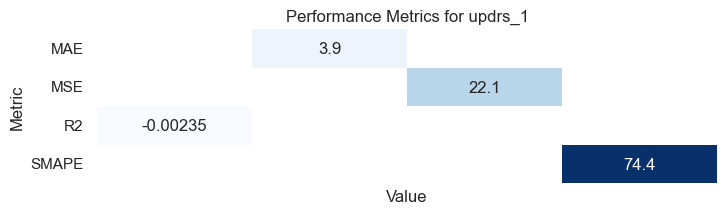

In [107]:
# Create a list of metric names and values.
metric_names = ['MSE', 'MAE', 'R2', 'SMAPE']
metric_values = [mse_updrs1, mae_updrs1, r2_updrs1, smape(y_test_updrs1, y_pred_updrs1)]

# Create a dataframe to hold the metric names and values.
df_metrics = pd.DataFrame({'Metric': metric_names, 'Value': metric_values})

# Create a heatmap to visualize the metrics.
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 2))
sns.heatmap(df_metrics.pivot("Metric", "Value", "Value"), annot=True, fmt=".3g", cmap='Blues', cbar=False)
plt.yticks(rotation=0)
ax.set_xticks([])
plt.title('Performance Metrics for updrs_1')
plt.show()

In [108]:
from sklearn.model_selection import cross_val_score

# Separate the dataset for updrs_1.
df_updrs1 = df[['updrs_1'] + list(df.columns[4:])].dropna()

# Separate the independent variables (predictors) and the dependent variable (target).
X_updrs1 = df_updrs1.iloc[:, 1:]
y_updrs1 = df_updrs1.iloc[:, 0]

# Select the top 10 features with the highest F-values.
selector1 = SelectKBest(f_regression, k = 10)
X_new1 = selector1.fit_transform(X_updrs1, y_updrs1)

# Add visit_month column to X_new.
X_new1 = np.column_stack((df_updrs1.iloc[:, 1].values, X_new1))

# Standardize the independent variables.
scaler1 = StandardScaler()
X_new1 = scaler1.fit_transform(X_new1)

# Fit a linear regression model using cross-validation.
model_updrs1_cv = LinearRegression()
scores = cross_val_score(model_updrs1_cv, X_new1, y_updrs1, cv = 5)
r2_updrs1_cv = scores.mean()

# Print the mean squared error.
print("r2_updrs1_cv:", r2_updrs1_cv)

r2_updrs1_cv: -0.005362151751512556


C:\Users\momsi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\momsi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


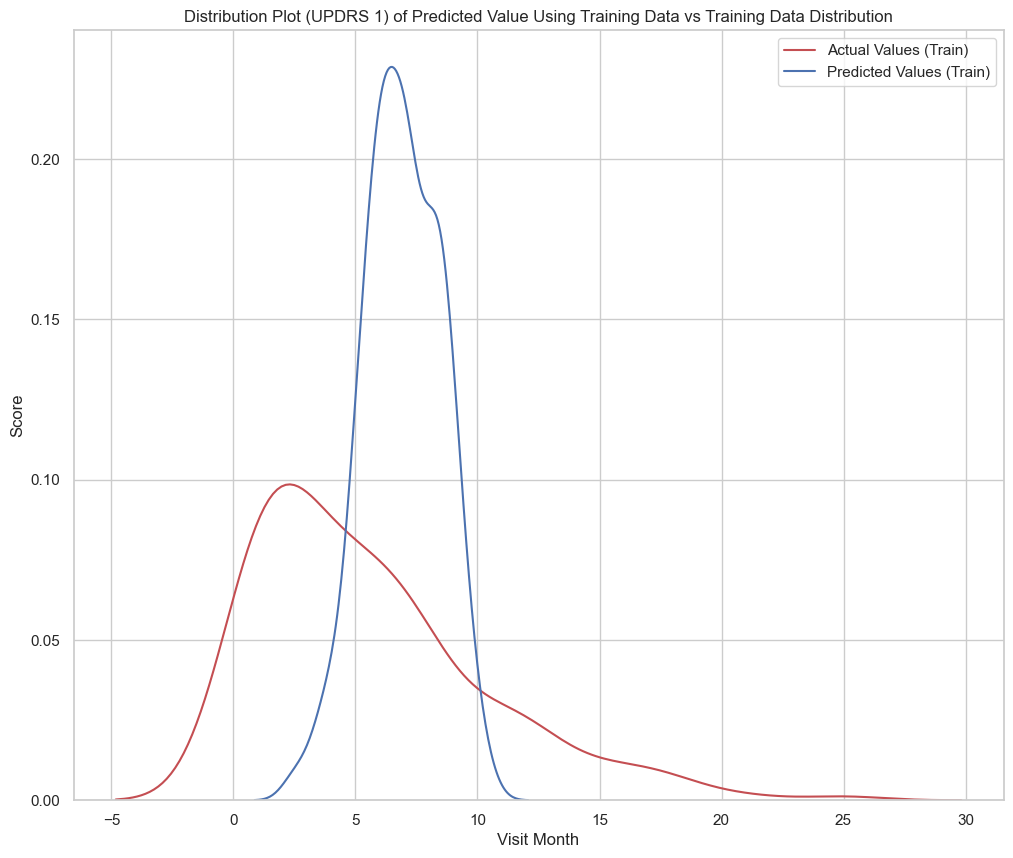

In [109]:
Title = 'Distribution Plot (UPDRS 1) of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_test_updrs1, y_pred_updrs1, "Actual Values (Train)", "Predicted Values (Train)", Title)